# Working on Categorical Data
Intent is to enable understanding & utilizing Categorical data in a pandas dataFrame. 

Also, being able to  modify Categorical dtypes columns, generate features &  visualize the categorical data.

____
### Quick Refresher:
Categorical data is a kind of **Qualitative Data**.

Ordinal Data - cariables have a natural order (eg. Rankings / Levels of Agreement etc. in a Survey). There is a certain relationship amongst the variables

Nominal Data - variables cannot be placed in a natural order i.e. don't contain any correlation to each other.
E.g. Countries / Colours etc.

<img src="https://intellspot.com/wp-content/uploads/2018/08/Types-of-Data-Infographic.png" width="600">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='darkgrid')

## Starting with the basic EDA steps:
- Importing the US Adults Census database. Trying to identify missing vlaues / column dtypes etc
- Identifying columns with **object dtype** - can be checked further if any of them can be converted to a categorical dtype (using `.astype`)

In [6]:
adults = pd.read_csv("./grownups_census.csv")

adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adults.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- We can see there are certain columns - such as Marital status, Occupation, Race etc. that we can probe further for categorical data.

- Use `.value_counts()` `.describe()` to gain more detailed understanding of the nature of this data

In [8]:
adults["Marital Status"].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object

`.describe()` identified that the column contains 7 unique values 

In [11]:
adults["Marital Status"].value_counts(normalize=True)

Marital Status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64

We can definitely conclude that `Marital Status` column contains some distinct categorical variables & their proportions 

You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, `Above/Below 50k`, you decide to explore the variable in more detail.
_____
### TEST QUESTIONS
**Q - Explore the Above/Below 50k variable by printing out a description of the variable's contents.**

- 2 unique variables ; '<=50k' is the top variable (alphabet-wise) with 24,720 frequency count(no. of occurrences) 

**Q - Explore the Above/Below 50k variable by printing out a frequency table of the values found in this column.**

- Is observed that there's a greater proportion of people From the dataset who make less than 50K than people making more than 50K

In [12]:
adults["Above/Below 50k"].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object

In [13]:
adults["Above/Below 50k"].value_counts(normalize=True)

Above/Below 50k
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

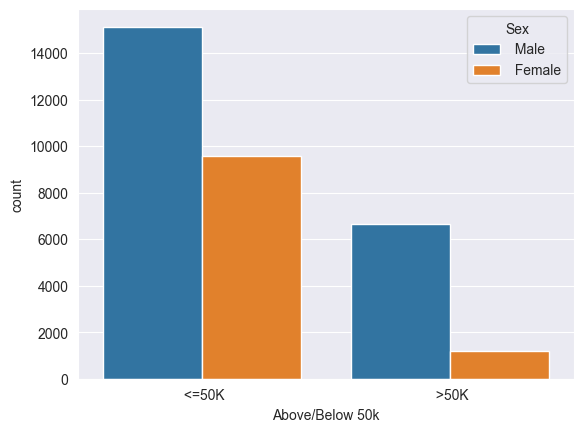

In [17]:
# Visualizing the above -- with added distinction of gender
sns.countplot(data=adults, x="Above/Below 50k", hue="Sex")
plt.show()


So its also observed that Males outrank female counterparts in both income categories

Sex
Male      21790
Female    10771
Name: count, dtype: int64